# Import Stuff

In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
from keras.layers import GRU,CuDNNGRU
from keras.layers import Dense, Dropout, Activation, Flatten,Reshape
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU
from keras.callbacks import CSVLogger, ModelCheckpoint
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline
%matplotlib notebook

Using TensorFlow backend.


In [2]:
data = pd.read_csv("merged_data.csv")

In [3]:
btc_trace = go.Scatter(x=data['Time'], y=data['Price'], name= 'Price')
py.iplot([btc_trace])

In [4]:
sent_trace = go.Scatter(x=data['Time'], y=data['Sentiment'], name= 'Sentiment')
py.iplot([sent_trace])

In [5]:
datag = data[['Price','Sentiment']].groupby(data['Time']).mean()

## Training a simple random model:

In [6]:
from sklearn.preprocessing import MinMaxScaler
print(datag.columns)
values = datag['Price'].values.reshape(-1,1)
sentiment = datag['Sentiment'].values.reshape(-1,1)
values = values.astype('float32')
sentiment = sentiment.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

Index([u'Price', u'Sentiment'], dtype='object')


In [7]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))
split = train_size

(448, 193)


In [8]:
def create_dataset(dataset, look_back, sentiment, sent=False):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        if i >= look_back:
            a = dataset[i-look_back:i+1, 0]
            a = a.tolist()
            if(sent==True):
                a.append(sentiment[i].tolist()[0])
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
    #print(len(dataY))
    return np.array(dataX), np.array(dataY)

### with lookback = 1 (kind of unigram)

In [9]:
look_back = 1
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size])
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)])

In [10]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


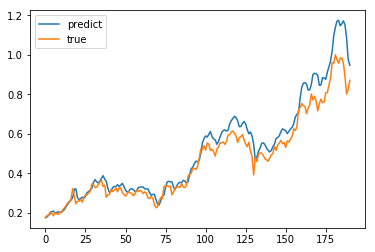

In [12]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [13]:
yhat_inverse_1 = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_1 = scaler.inverse_transform(testY.reshape(-1, 1))

In [14]:
rmse_1 = sqrt(mean_squared_error(testY_inverse_1, yhat_inverse_1))
print('Test RMSE: %.3f' % rmse_1)

Test RMSE: 499.327


In [15]:
model_1 = model

### with lookback = 2(kind of biram)

In [16]:
look_back = 2
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size])
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)])

In [17]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [18]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

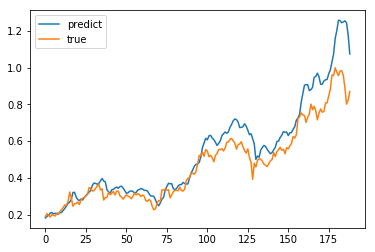

In [19]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [20]:
yhat_inverse_2 = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_2 = scaler.inverse_transform(testY.reshape(-1, 1))

In [21]:
rmse_2 = sqrt(mean_squared_error(testY_inverse_2, yhat_inverse_2))
print('Test RMSE: %.3f' % rmse_2)

Test RMSE: 724.151


In [22]:
model2 = model

## With lookback = 3

In [23]:
look_back = 3
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size])
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)])

In [24]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [25]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

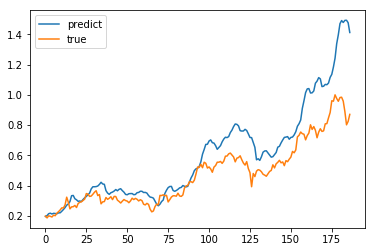

In [26]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [27]:
yhat_inverse_3 = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_3 = scaler.inverse_transform(testY.reshape(-1, 1))

In [28]:
rmse_3 = sqrt(mean_squared_error(testY_inverse_3, yhat_inverse_3))
print('Test RMSE: %.3f' % rmse_3)

Test RMSE: 1262.204


In [29]:
model3 = model

## Plotting different lookups

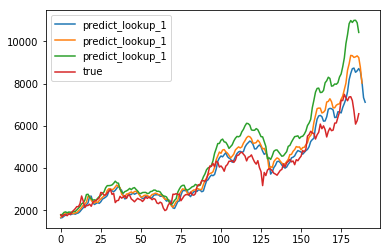

In [30]:
pyplot.plot(yhat_inverse_1, label='predict_lookup_1')
pyplot.plot(yhat_inverse_2, label='predict_lookup_1')
pyplot.plot(yhat_inverse_3, label='predict_lookup_1')
pyplot.plot(testY_inverse_3, label='true')
pyplot.legend()
pyplot.show()

In [31]:
len(datag.index.values)

641

In [38]:
print(yhat_inverse_1.shape)
btc_1_trace = go.Scatter(x=datag.index.values[3605-1080-1:], y=yhat_inverse_1.reshape(1080), name= 'predict_lookup_1')
btc_2_trace = go.Scatter(x=datag.index.values[3605-1078-1:], y=yhat_inverse_2.reshape(1078), name= 'predict_lookup_2')
btc_3_trace = go.Scatter(x=datag.index.values[3605-1076-1:], y=yhat_inverse_3.reshape(1076), name= 'predict_lookup_3')
btc_t_trace = go.Scatter(x=datag.index.values[3605-1080-1:], y=testY_inverse_1.reshape(1080), name= 'True')

py.iplot([btc_1_trace,btc_2_trace, btc_3_trace, btc_t_trace])

(191, 1)


ValueError: cannot reshape array of size 191 into shape (191,1080)

# With sentiment and lookup2

In [39]:
look_back = 2
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size],sent=True)
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)], sent=True)

In [40]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [41]:
#model = Sequential()
#model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
#model.add(LSTM(100))
#model.add(Dense(1))
#model.compile(loss='mae', optimizer='adam')
#history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)



output_file_name='bitcoin2015to2017_close_GRU_1_tanh_relu_'
model = Sequential()
model.add(GRU(units=50, input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=False))
model.add(Activation('tanh'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('relu'))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, batch_size=100,validation_data=(testX,testY), epochs = 300, callbacks=[CSVLogger(output_file_name+'.csv', append=True),ModelCheckpoint('weights/'+output_file_name+'-{epoch:02d}-{val_loss:.5f}.hdf5', monitor='val_loss', verbose=1,mode='min')])









Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 444 samples, validate on 189 samples
Epoch 1/300
444/444 [==============================] - 2s 4ms/step - loss: 0.0372 - val_loss: 0.4380

Epoch 00001: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-01-0.43802.hdf5
Epoch 2/300
444/444 [==============================] - 0s 45us/step - loss: 0.0327 - val_loss: 0.4024

Epoch 00002: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-02-0.40244.hdf5
Epoch 3/300
444/444 [==============================] - 0s 57us/step - loss: 0.0307 - val_loss: 0.3796

Epoch 00003: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-03-0.37961.hdf5
Epoch 4/300
444/444 [==============================] - 0s 59us/step - loss: 0.0284 - val_loss: 0.3531

Epoch 00004: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-04-0.35311.hdf5
Epoch 5/300
444/444 [==============================]

444/444 [==============================] - 0s 63us/step - loss: 0.0052 - val_loss: 0.0309

Epoch 00040: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-40-0.03090.hdf5
Epoch 41/300
444/444 [==============================] - ETA: 0s - loss: 0.005 - 0s 55us/step - loss: 0.0050 - val_loss: 0.0304

Epoch 00041: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-41-0.03041.hdf5
Epoch 42/300
444/444 [==============================] - 0s 55us/step - loss: 0.0053 - val_loss: 0.0305

Epoch 00042: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-42-0.03047.hdf5
Epoch 43/300
444/444 [==============================] - 0s 46us/step - loss: 0.0052 - val_loss: 0.0305

Epoch 00043: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-43-0.03047.hdf5
Epoch 44/300
444/444 [==============================] - 0s 43us/step - loss: 0.0049 - val_loss: 0.0303

Epoch 00044: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-44-0.03029.hdf5

444/444 [==============================] - 0s 52us/step - loss: 0.0049 - val_loss: 0.0298

Epoch 00081: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-81-0.02981.hdf5
Epoch 82/300
444/444 [==============================] - 0s 51us/step - loss: 0.0046 - val_loss: 0.0300

Epoch 00082: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-82-0.02998.hdf5
Epoch 83/300
444/444 [==============================] - 0s 52us/step - loss: 0.0051 - val_loss: 0.0314

Epoch 00083: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-83-0.03138.hdf5
Epoch 84/300
444/444 [==============================] - 0s 45us/step - loss: 0.0048 - val_loss: 0.0314

Epoch 00084: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-84-0.03135.hdf5
Epoch 85/300
444/444 [==============================] - 0s 43us/step - loss: 0.0046 - val_loss: 0.0301

Epoch 00085: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-85-0.03012.hdf5
Epoch 86/300
444/444 [=

444/444 [==============================] - 0s 54us/step - loss: 0.0042 - val_loss: 0.0293

Epoch 00122: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-122-0.02933.hdf5
Epoch 123/300
444/444 [==============================] - 0s 58us/step - loss: 0.0041 - val_loss: 0.0294

Epoch 00123: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-123-0.02940.hdf5
Epoch 124/300
444/444 [==============================] - 0s 54us/step - loss: 0.0044 - val_loss: 0.0299

Epoch 00124: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-124-0.02989.hdf5
Epoch 125/300
444/444 [==============================] - 0s 44us/step - loss: 0.0042 - val_loss: 0.0305

Epoch 00125: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-125-0.03045.hdf5
Epoch 126/300
444/444 [==============================] - 0s 55us/step - loss: 0.0044 - val_loss: 0.0295

Epoch 00126: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-126-0.02950.hdf5
Epoch 127/300


Epoch 163/300
444/444 [==============================] - 0s 54us/step - loss: 0.0041 - val_loss: 0.0299

Epoch 00163: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-163-0.02988.hdf5
Epoch 164/300
444/444 [==============================] - 0s 64us/step - loss: 0.0039 - val_loss: 0.0294

Epoch 00164: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-164-0.02944.hdf5
Epoch 165/300
444/444 [==============================] - 0s 49us/step - loss: 0.0042 - val_loss: 0.0303

Epoch 00165: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-165-0.03028.hdf5
Epoch 166/300
444/444 [==============================] - 0s 46us/step - loss: 0.0043 - val_loss: 0.0311

Epoch 00166: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-166-0.03109.hdf5
Epoch 167/300
444/444 [==============================] - 0s 45us/step - loss: 0.0042 - val_loss: 0.0299

Epoch 00167: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-167-0.02986.hdf5


Epoch 204/300
444/444 [==============================] - 0s 54us/step - loss: 0.0041 - val_loss: 0.0297

Epoch 00204: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-204-0.02969.hdf5
Epoch 205/300
444/444 [==============================] - 0s 109us/step - loss: 0.0043 - val_loss: 0.0308

Epoch 00205: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-205-0.03085.hdf5
Epoch 206/300
444/444 [==============================] - 0s 43us/step - loss: 0.0044 - val_loss: 0.0295

Epoch 00206: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-206-0.02954.hdf5
Epoch 207/300
444/444 [==============================] - 0s 47us/step - loss: 0.0040 - val_loss: 0.0299

Epoch 00207: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-207-0.02986.hdf5
Epoch 208/300
444/444 [==============================] - 0s 94us/step - loss: 0.0041 - val_loss: 0.0305

Epoch 00208: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-208-0.03054.hdf5

Epoch 245/300
444/444 [==============================] - 0s 88us/step - loss: 0.0037 - val_loss: 0.0313

Epoch 00245: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-245-0.03128.hdf5
Epoch 246/300
444/444 [==============================] - 0s 66us/step - loss: 0.0039 - val_loss: 0.0293

Epoch 00246: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-246-0.02927.hdf5
Epoch 247/300
444/444 [==============================] - 0s 125us/step - loss: 0.0043 - val_loss: 0.0286

Epoch 00247: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-247-0.02863.hdf5
Epoch 248/300
444/444 [==============================] - 0s 106us/step - loss: 0.0040 - val_loss: 0.0286

Epoch 00248: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-248-0.02860.hdf5
Epoch 249/300
444/444 [==============================] - 0s 133us/step - loss: 0.0044 - val_loss: 0.0289

Epoch 00249: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-249-0.02894.hd

Epoch 286/300
444/444 [==============================] - 0s 53us/step - loss: 0.0038 - val_loss: 0.0349

Epoch 00286: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-286-0.03490.hdf5
Epoch 287/300
444/444 [==============================] - 0s 46us/step - loss: 0.0039 - val_loss: 0.0315

Epoch 00287: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-287-0.03153.hdf5
Epoch 288/300
444/444 [==============================] - 0s 42us/step - loss: 0.0039 - val_loss: 0.0295

Epoch 00288: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-288-0.02954.hdf5
Epoch 289/300
444/444 [==============================] - 0s 45us/step - loss: 0.0039 - val_loss: 0.0287

Epoch 00289: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-289-0.02870.hdf5
Epoch 290/300
444/444 [==============================] - 0s 62us/step - loss: 0.0038 - val_loss: 0.0287

Epoch 00290: saving model to weights/bitcoin2015to2017_close_GRU_1_tanh_relu_-290-0.02865.hdf5


In [ ]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [ ]:
yhat_inverse_sent = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_sent = scaler.inverse_transform(testY.reshape(-1, 1))

In [ ]:
rmse_sent = sqrt(mean_squared_error(testY_inverse_sent, yhat_inverse_sent))
print('Test RMSE: %.3f' % rmse_sent)

In [ ]:
len(yhat)

In [ ]:
btc_1_trace = go.Scatter(x=datag.index.values[3605-1078-1:][0:500], y=yhat_inverse_sent.reshape(1078)[0:500], name= 'With_Sentiment')
btc_2_trace = go.Scatter(x=datag.index.values[3605-1080-1:][0:500], y=yhat_inverse_1.reshape(1080)[0:500], name= 'No_Sentiment')
btc_3_trace = go.Scatter(x=datag.index.values[3605-1078-1:][0:500], y=testY_inverse_sent.reshape(1078)[0:500], name= 'True')
py.iplot([btc_1_trace,btc_2_trace,btc_3_trace])

In [ ]:
model_sent = model

## Now go live with the model:

In [ ]:
import MySQLdb
#Enter the values for you database connection
dsn_database = "bitcoin"         # e.g. "MySQLdbtest"
dsn_hostname = "173.194.231.244"      # e.g.: "mydbinstance.xyz.us-east-1.rds.amazonaws.com"
dsn_port = 3306                  # e.g. 3306 
dsn_uid = "demo"             # e.g. "user1"
dsn_pwd = "qwerty@123"              # e.g. "Password123"

In [ ]:
conn = MySQLdb.connect(host=dsn_hostname, port=dsn_port, user=dsn_uid, passwd=dsn_pwd, db=dsn_database)

In [ ]:
cursor=conn.cursor()
cursor.execute("""SELECT * FROM live_data""")
cursor.fetchone()

In [ ]:
print ("\nShow me the records:\n")
rows = cursor.fetchall()
import pprint
pprint.pprint(rows)

In [ ]:
cursor.execute("""INSERT INTO live_data values(15625,16000,0.8,'1000-01-01 00:00:00');""")

In [ ]:
conn.commit()

In [ ]:
cursor.close()

In [ ]:
# develop a real time pipeline

In [ ]:
import queue 
import time
import matplotlib

In [ ]:
matplotlib.__version__

In [ ]:
import queue
import matplotlib.pyplot as plt
true_q = queue.Queue()
pred_q = queue.Queue()
'''
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()
fig.canvas.draw()
plt.ion()
'''

def process_data(in_data):
    out_data = []
    for line in in_data:
        out_data.append(float(line.split(',')[0]))
    return np.array(out_data).reshape(-1,1)
prev = 15000
threshold = 0.5
while True:
    btc = open('live_bitcoin.csv','r')
    sent = open('live_tweet.csv','r')
    bit_data = btc.readlines()
    sent_data = sent.readlines()
    bit_data = process_data(bit_data[len(bit_data)-5:])
    sent_data = process_data(sent_data[len(sent_data)-5:])
    live = scaler.transform(bit_data)
    testX, testY = create_dataset(live, 2, sent_data, sent=True)
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    yhat = model.predict(testX)
    yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
    true_q.put(bit_data[4])
    pred_q.put(yhat_inverse[0])
    val = 100*((yhat_inverse[0][0] - prev)/prev)
    if val > threshold:
        decision = 'buy'
    elif val <-threshold:
        decision = 'sell'
    else:
        decision = ''
    prev = yhat_inverse[0][0]
    input_string = "INSERT INTO live_data values ({},{},{},'{}','{}');".format(yhat_inverse[0][0],bit_data[0][0],sent_data[4][0],datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S '),decision)
    cursor.execute(input_string)
    conn.commit()
    time.sleep(60)
    '''
    if true_q.qsize() > 9:
        true_q.get()
        pred_q.get()
        ax.clear()
        ax.plot()
        ax.plot(list(true_q.queue),'-',label='True')
        ax.plot(list(pred_q.queue),'--',label='Predict')
        ax.legend()
        fig.canvas.draw()
        time.sleep(60)
    ''' 
        

In [ ]:
import datetime
datetime.datetime.now()